In [2]:
import csv
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, gradient_boosting, RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import zscore

In [3]:
df=pd.read_excel(r'C:\Users\Nikhil\Downloads\Doctor_fee_consultation\Final Participant Data Folder\Final_Train.xlsx')

In [4]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [5]:
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [6]:
df.shape

(5961, 7)

In [7]:
df.isna().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [8]:
# Extract years of experience
df["Experience"] = df["Experience"].str.split()
df["Experience"] = df["Experience"].str[0].astype("int")

In [9]:
# Extract cities
df["Place"].fillna("Unknown,Unknown",inplace=True)
df["Place"] = df["Place"].str.split(",")
df["City"] = df["Place"].str[-1]
df["Place"] = df["Place"].str[0]

In [10]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City
0,"BHMS, MD - Homeopathy",24,100%,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,Mathikere - BEL,ENT Specialist,NaN,300,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore
4,BAMS,20,100%,Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai


In [11]:
# Seperate Ratings into bins
df["Rating"].fillna("-99%",inplace=True)
df["Rating"] = df["Rating"].str[:-1].astype("int")
bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
df["Rating"] = pd.cut(df["Rating"],bins=bins,labels=labels,include_lowest=True)

In [12]:
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City
0,"BHMS, MD - Homeopathy",24,10,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,10,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,0,Mathikere - BEL,ENT Specialist,NaN,300,Bangalore
3,"BSc - Zoology, BAMS",12,0,Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore
4,BAMS,20,10,Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai
...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,10,Basavanagudi,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Bangalore
5957,MBBS,33,0,Nungambakkam,General Medicine,NaN,100,Chennai
5958,MBBS,41,10,Greater Kailash Part 2,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Delhi
5959,"MBBS, MD - General Medicine",15,9,Vileparle West,General Medicine,General Medical Consultation Viral Fever Treat...,100,Mumbai


In [13]:
df['Rating'].value_counts().sort_index()

0     3302
1        1
2        0
3        0
4        4
5        3
6       19
7       32
8       98
9      280
10    2222
Name: Rating, dtype: int64

In [14]:
# Extract relevant qualification
df["Qualification"]=df["Qualification"].str.split(",")
Qualification ={}
for x in df["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1

In [15]:
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City
0,"[BHMS, MD - Homeopathy]",24,10,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam
1,"[BAMS, MD - Ayurveda Medicine]",12,10,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore
2,"[MBBS, MS - Otorhinolaryngology]",9,0,Mathikere - BEL,ENT Specialist,NaN,300,Bangalore
3,"[BSc - Zoology, BAMS]",12,0,Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore
4,[BAMS],20,10,Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai
...,...,...,...,...,...,...,...,...
5956,"[MBBS, MS - ENT]",19,10,Basavanagudi,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Bangalore
5957,[MBBS],33,0,Nungambakkam,General Medicine,NaN,100,Chennai
5958,[MBBS],41,10,Greater Kailash Part 2,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Delhi
5959,"[MBBS, MD - General Medicine]",15,9,Vileparle West,General Medicine,General Medical Consultation Viral Fever Treat...,100,Mumbai


In [16]:
most_qua = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qua =[]
for tup in most_qua:
    final_qua.append(tup[0])
for title in final_qua:
    df[title]=0
    
for x,y in zip(df["Qualification"].values,np.array([idx for idx in range(len(df))])):
    for q in x:
        q = q.strip()
        if q in final_qua:
            df[q][y] = 1
df.drop("Qualification",axis=1,inplace=True)

In [17]:
df.Profile.value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [18]:
df

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,10,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,Mathikere - BEL,ENT Specialist,NaN,300,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,0,Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,10,Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,10,Basavanagudi,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Bangalore,1,0,0,0,0,1,0,0,0,0
5957,33,0,Nungambakkam,General Medicine,NaN,100,Chennai,1,0,0,0,0,0,0,0,0,0
5958,41,10,Greater Kailash Part 2,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Delhi,1,0,0,0,0,0,0,0,0,0
5959,15,9,Vileparle West,General Medicine,General Medical Consultation Viral Fever Treat...,100,Mumbai,1,0,0,0,0,0,0,1,0,0


In [19]:
df.City.value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Unknown                  25
e                         1
Name: City, dtype: int64

In [20]:
df["City"][3980] = "Unknown"
df["Place"][3980] = "Unknown"

In [21]:
# Get dummies
df = pd.get_dummies(df,columns=["City","Profile"],prefix=["City","Profile"])

In [22]:
df.drop("Miscellaneous_Info",axis=1,inplace=True)


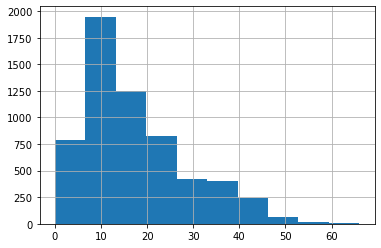

In [23]:
df['Experience'].hist()

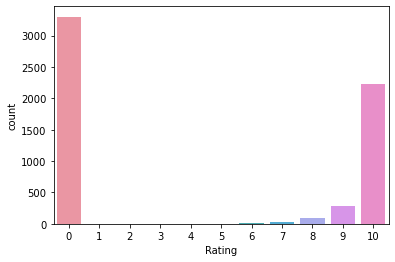

In [24]:
sns.countplot(df['Rating'])

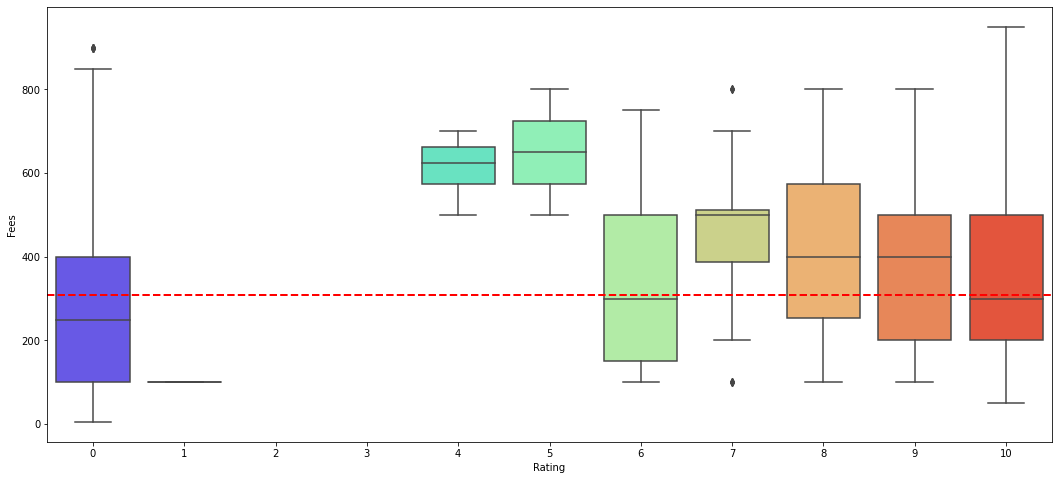

In [25]:
plt.figure(figsize=(18,8))
mean_price=np.mean(df['Fees'])
sns.boxplot(y='Fees',x='Rating',data=df,palette='rainbow')
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.show()

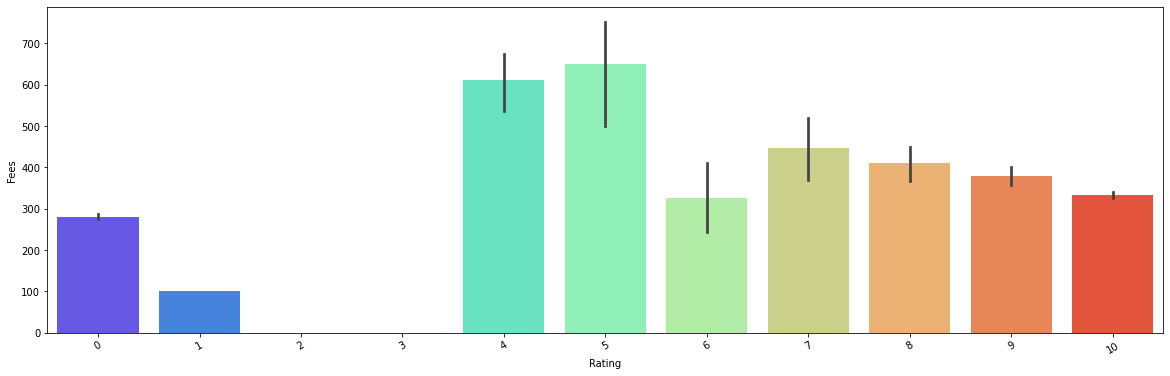

In [26]:
plt.figure(figsize=(20,6))
sns.barplot(y='Fees',x='Rating',data=df,palette='rainbow')
plt.xticks(rotation=30)
plt.show()

In [27]:
df.corr()

,Experience,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
Experience,1.000000,0.002117,0.271347,-0.196268,-0.047150,-0.114191,-0.067704,0.093778,-0.120213,0.097549,...,-0.054732,0.053884,-0.014791,-0.092512,-0.042496,-0.201596,-0.096003,0.082435,0.335864,-0.070010
Fees,0.002117,1.000000,0.271038,-0.198635,-0.139891,-0.002423,0.163811,0.128413,0.113091,0.040921,...,-0.000997,0.000925,-0.089157,-0.069429,-0.140812,-0.202126,0.204426,0.155084,0.015463,-0.003072
MBBS,0.271347,0.271038,1.000000,-0.512244,-0.358911,-0.355083,0.314207,0.263449,0.213185,0.220358,...,0.036254,-0.051340,-0.063328,-0.057298,-0.364432,-0.520789,0.419355,0.358680,0.499656,-0.375863
BDS,-0.196268,-0.198635,-0.512244,1.000000,-0.208341,-0.206141,-0.182900,-0.148092,-0.123730,-0.121943,...,-0.003589,-0.065901,0.078242,-0.029956,-0.212086,0.983629,-0.249302,-0.202977,-0.269357,-0.220862
BAMS,-0.047150,-0.139891,-0.358911,-0.208341,1.000000,-0.145019,-0.128669,-0.104182,-0.087044,-0.078722,...,-0.019987,0.102361,0.021094,-0.025339,0.977884,-0.211808,-0.175383,-0.142793,-0.186964,-0.153933
BHMS,-0.114191,-0.002423,-0.355083,-0.206141,-0.145019,1.000000,-0.127311,-0.103082,-0.086124,-0.077760,...,-0.019823,0.035203,-0.011855,-0.025072,-0.147626,-0.209572,-0.172193,-0.141285,-0.186217,0.930441
MD - Dermatology,-0.067704,0.163811,0.314207,-0.182900,-0.128669,-0.127311,1.000000,-0.091460,0.637946,-0.075311,...,0.017416,-0.029916,-0.040663,-0.022245,-0.130983,-0.185944,0.729248,-0.123660,-0.163558,-0.136402
MS - ENT,0.093778,0.128413,0.263449,-0.148092,-0.104182,-0.103082,-0.091460,1.000000,-0.061872,-0.060978,...,-0.013687,-0.014853,-0.032925,-0.018012,-0.106055,-0.150557,-0.124665,0.719488,-0.126366,-0.110443
Venereology & Leprosy,-0.120213,0.113091,0.213185,-0.123730,-0.087044,-0.086124,0.637946,-0.061872,1.000000,-0.050947,...,0.025972,-0.022928,-0.027508,-0.015049,-0.088608,-0.125789,0.492208,-0.082433,-0.110584,-0.092275
MD - General Medicine,0.097549,0.040921,0.220358,-0.121943,-0.078722,-0.077760,-0.075311,-0.060978,-0.050947,1.000000,...,0.050527,-0.031738,0.019044,-0.014831,-0.080357,-0.123973,-0.098500,-0.083578,0.438876,-0.086429


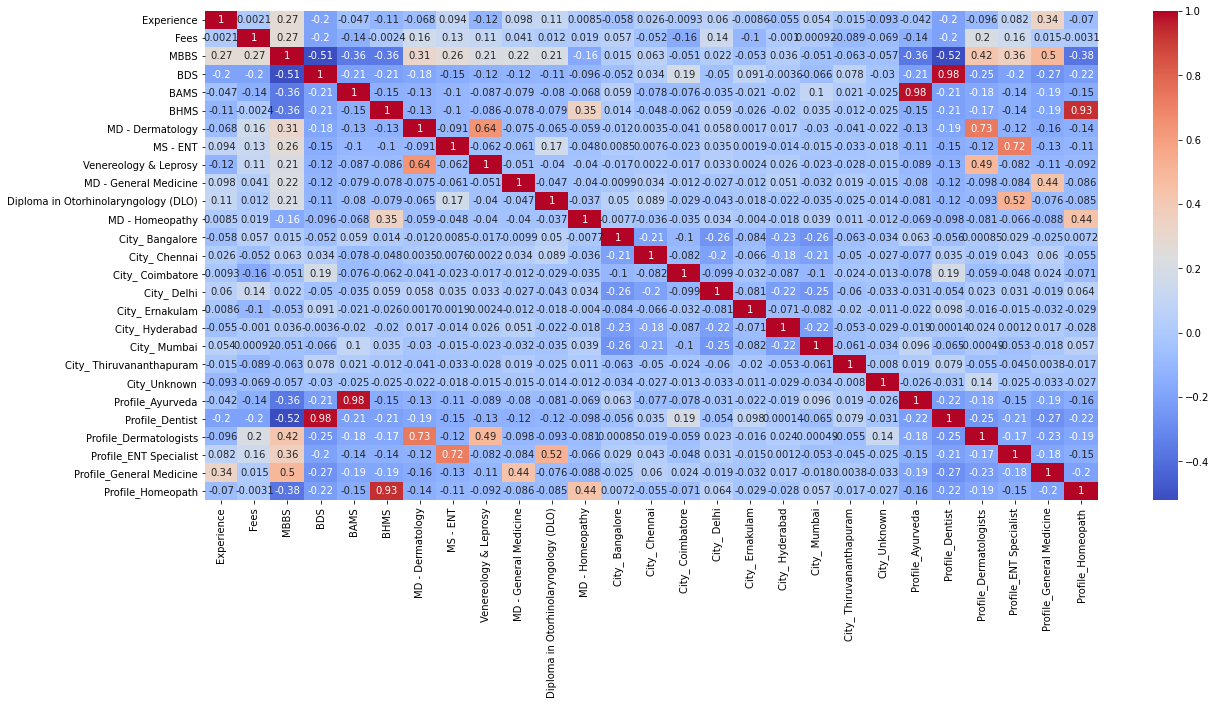

In [28]:
plt.figure(figsize=(20,9))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [29]:
df.skew()

Experience                               0.991089
Rating                                   0.240670
Fees                                     0.751870
MBBS                                     0.118000
BDS                                      1.293695
BAMS                                     2.229777
BHMS                                     2.261706
MD - Dermatology                         2.639954
MS - ENT                                 3.403459
Venereology & Leprosy                    4.171950
MD - General Medicine                    4.239699
Diploma in Otorhinolaryngology (DLO)     4.581912
MD - Homeopathy                          5.475409
City_ Bangalore                          1.416677
City_ Chennai                            2.035059
City_ Coimbatore                         4.816241
City_ Delhi                              1.509849
City_ Ernakulam                          6.000437
City_ Hyderabad                          1.860027
City_ Mumbai                             1.465681


TypeError: unsupported operand type(s) for /: 'str' and 'int'

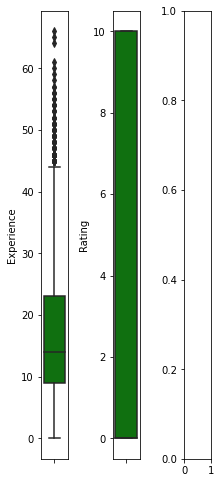

In [30]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [31]:
x = df.drop("Fees",axis=1)
y = df["Fees"]
# Encoding
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
x = enc.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
# feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [32]:
# support vector machine 
from sklearn.svm import SVR
m = SVR(gamma="scale")
m.fit(scaler.transform(x_train),y_train)

SVR()

In [33]:
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2
# Prediction
y_pred = m.predict(scaler.transform(x_test))
score(y_pred,y_test)

0.7497837715460882

In [34]:
#importing error metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [35]:
model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]


for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Score of',m,'is:',score)
    print('MAE:',mean_absolute_error(y_test,predm))
    print('MSE:',mean_squared_error(y_test,predm))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
    print('R2_score:',r2_score(y_test,predm))
    print('*************************************************************************')
    print('\n')

Score of LinearRegression() is: 0.17260767283178768
MAE: 877823463031476.1
MSE: 7.801454612149456e+29
RMSE: 883258433990270.9
R2_score: -1.9904337650927963e+25
*************************************************************************


Score of SVR() is: 0.09090390584212649
MAE: 162.58039871308966
MSE: 42787.0764783563
RMSE: 206.85037219777078
R2_score: -0.0916533642264381
*************************************************************************


Score of DecisionTreeRegressor() is: 0.9922141762533405
MAE: 222.0821458507963
MSE: 86689.96311818944
RMSE: 294.43159327454896
R2_score: -1.2117750889221965
*************************************************************************


Score of KNeighborsRegressor() is: 0.37378508796375387
MAE: 174.4509639564124
MSE: 43038.71081307628
RMSE: 207.45773259407875
R2_score: -0.0980734679273978
*************************************************************************


Score of Lasso() is: 0.17239852238623488
MAE: 3525.4770810578966
MSE: 17216523.3021

In [36]:
import joblib

In [37]:
joblib.dump(DecisionTreeRegressor(),'doctors_fee.pkl')

['doctors_fee.pkl']

# Using Test Dataset

In [38]:
test_df=pd.read_excel(r'C:\Users\Nikhil\Downloads\Doctor_fee_consultation\Final Participant Data Folder\Final_Test.xlsx')

In [39]:
test_df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [41]:
test_df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [43]:
test_df.isna().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [44]:
# Extract years of experience
test_df["Experience"] = test_df["Experience"].str.split()
test_df["Experience"] = test_df["Experience"].str[0].astype("int")

In [45]:
# Extract cities
test_df["Place"].fillna("Unknown,Unknown",inplace=True)
test_df["Place"] = test_df["Place"].str.split(",")
test_df["City"] = test_df["Place"].str[-1]
test_df["Place"] = test_df["Place"].str[0]

In [46]:
# Seperate Ratings into bins
test_df["Rating"].fillna("-99%",inplace=True)
test_df["Rating"] = test_df["Rating"].str[:-1].astype("int")
bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
test_df["Rating"] = pd.cut(test_df["Rating"],bins=bins,labels=labels,include_lowest=True)

In [47]:
# Extract relevant qualification
test_df["Qualification"]=test_df["Qualification"].str.split(",")
Qualification ={}
for x in test_df["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1

In [48]:
most_qua = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qua =[]
for tup in most_qua:
    final_qua.append(tup[0])
for title in final_qua:
    test_df[title]=0
    
for x,y in zip(test_df["Qualification"].values,np.array([idx for idx in range(len(test_df))])):
    for q in x:
        q = q.strip()
        if q in final_qua:
            test_df[q][y] = 1
test_df.drop("Qualification",axis=1,inplace=True)

In [49]:
test_df.City.value_counts()

 Bangalore             420
 Delhi                 417
 Mumbai                389
 Hyderabad             333
 Chennai               287
 Coimbatore             70
 Ernakulam              48
 Thiruvananthapuram     17
Unknown                  6
Name: City, dtype: int64

In [50]:
# Get dummies
test_df = pd.get_dummies(test_df,columns=["City","Profile"],prefix=["City","Profile"])

In [51]:
test_df.drop("Miscellaneous_Info",axis=1,inplace=True)

In [52]:
df

,Experience,Rating,Place,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,10,Kakkanad,100,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,Whitefield,350,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,Mathikere - BEL,300,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,Bannerghatta Road,250,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,10,Keelkattalai,250,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,10,Basavanagudi,300,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5957,33,0,Nungambakkam,100,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5958,41,10,Greater Kailash Part 2,600,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5959,15,9,Vileparle West,100,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [53]:
fitted_model=joblib.load(open('doctors_fee.pkl','rb'))

In [54]:
fitted_model

DecisionTreeRegressor()